## Lab 10

### Zad 1 - Wachadło matematyczne

$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

x - kąt wychylenia wahadła,  
t - czas,  
g - przyspieszenie grawitacyjne,   
l - długość wahadła,  


In [1]:
using Plots

# Parametry
g = 9.81  # Przyspieszenie ziemskie (m/s^2)
l = 1.0   # Długość wahadła (m)
theta0 = π/4  # Początkowy kąt wychylenia (radiany)
omega0 = 0.0  # Początkowa prędkość kątowa (rad/s)
dt = 0.01    # Krok czasowy (s)
n = 1000     # Liczba kroków czasowych

1000

### Metoda Eulera

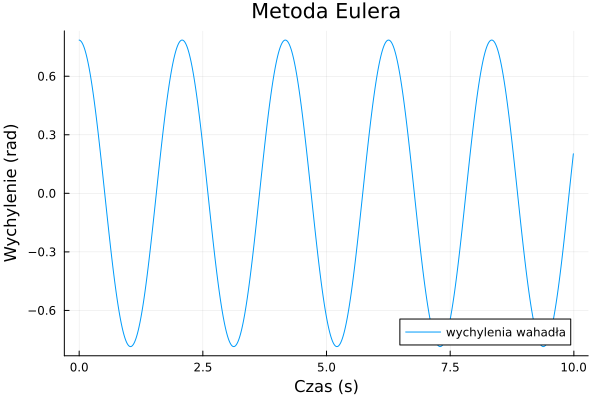

In [13]:
function euler_method(theta0, omega0, g, l, dt, n)
    theta = zeros(n)
    omega = zeros(n)
    
    theta[1] = theta0
    omega[1] = omega0
    
    for i in 1:n-1
        omega[i+1] = omega[i] - (g/l) * sin(theta[i]) * dt # obliczanie nowej prędkości kątowej
        theta[i+1] = theta[i] + omega[i+1] * dt # obliczanie nowego wychylenia
    end
    
    return theta, omega
end

# Wywołanie funkcji rozwiązującej
theta_euler, _ = euler_method(theta0, omega0, g, l, dt, n)

t = dt .* (0:n-1)
plot(t, theta_euler, xlabel="Czas (s)", ylabel="Wychylenie (rad)", label="wychylenia wahadła", title="Metoda Eulera", legend=:bottomright)

### Metoda Rungego-Kutty

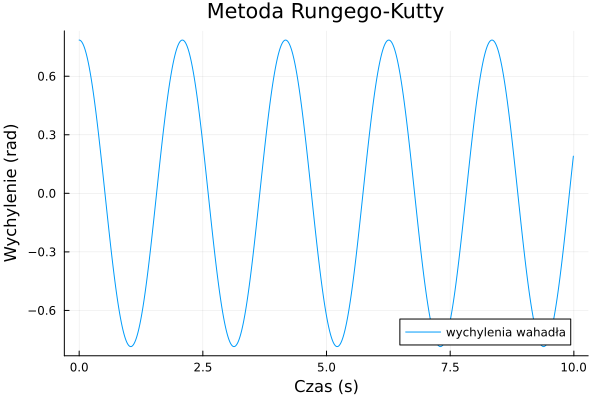

In [14]:
function runge_kutta(theta0, omega0, g, l, dt, n)
    theta = zeros(n)
    omega = zeros(n)
    
    theta[1] = theta0
    omega[1] = omega0
    
    for i in 1:n-1
        k1_theta = omega[i]
        k1_omega = -g/l * sin(theta[i])
        
        k2_theta = omega[i] + 0.5*dt*k1_omega
        k2_omega = -g/l * sin(theta[i] + 0.5*dt*k1_theta)
        
        k3_theta = omega[i] + 0.5*dt*k2_omega
        k3_omega = -g/l * sin(theta[i] + 0.5*dt*k2_theta)
        
        k4_theta = omega[i] + dt*k3_omega
        k4_omega = -g/l * sin(theta[i] + dt*k3_theta)
        
        theta[i+1] = theta[i] + (dt/6) * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)
        omega[i+1] = omega[i] + (dt/6) * (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega)
    end
    
    return theta, omega
end

# Wywołanie funkcji rozwiązującej
theta, _ = runge_kutta(theta0, omega0, g, l, dt, n)

t = dt .* (0:n-1)
plot(t, theta, xlabel="Czas (s)", ylabel="Wychylenie (rad)", label="wychylenia wahadła", title="Metoda Rungego-Kutty", legend=:bottomright)

### Porównainie stabilności

In [15]:
# Wartości kroków czasowych do przetestowania
dt_values = [0.01, 0.05, 0.1, 0.3]
theta_euler_results = Vector{Vector{Float64}}(undef, length(dt_values))
theta_rk_results = Vector{Vector{Float64}}(undef, length(dt_values))


# Pętla po różnych wartościach kroków czasowych
for (i, dt) in enumerate(dt_values)
    # Symulacja z użyciem metody Eulera
    theta_euler, _ = euler_method(theta0, omega0, g, l, dt, n)

    # Symulacja z użyciem metody Rungego-Kutty'ego
    theta_rk, _ = runge_kutta(theta0, omega0, g, l, dt, n)

    
    theta_euler_results[i] = theta_euler
    theta_rk_results[i] = theta_rk
end

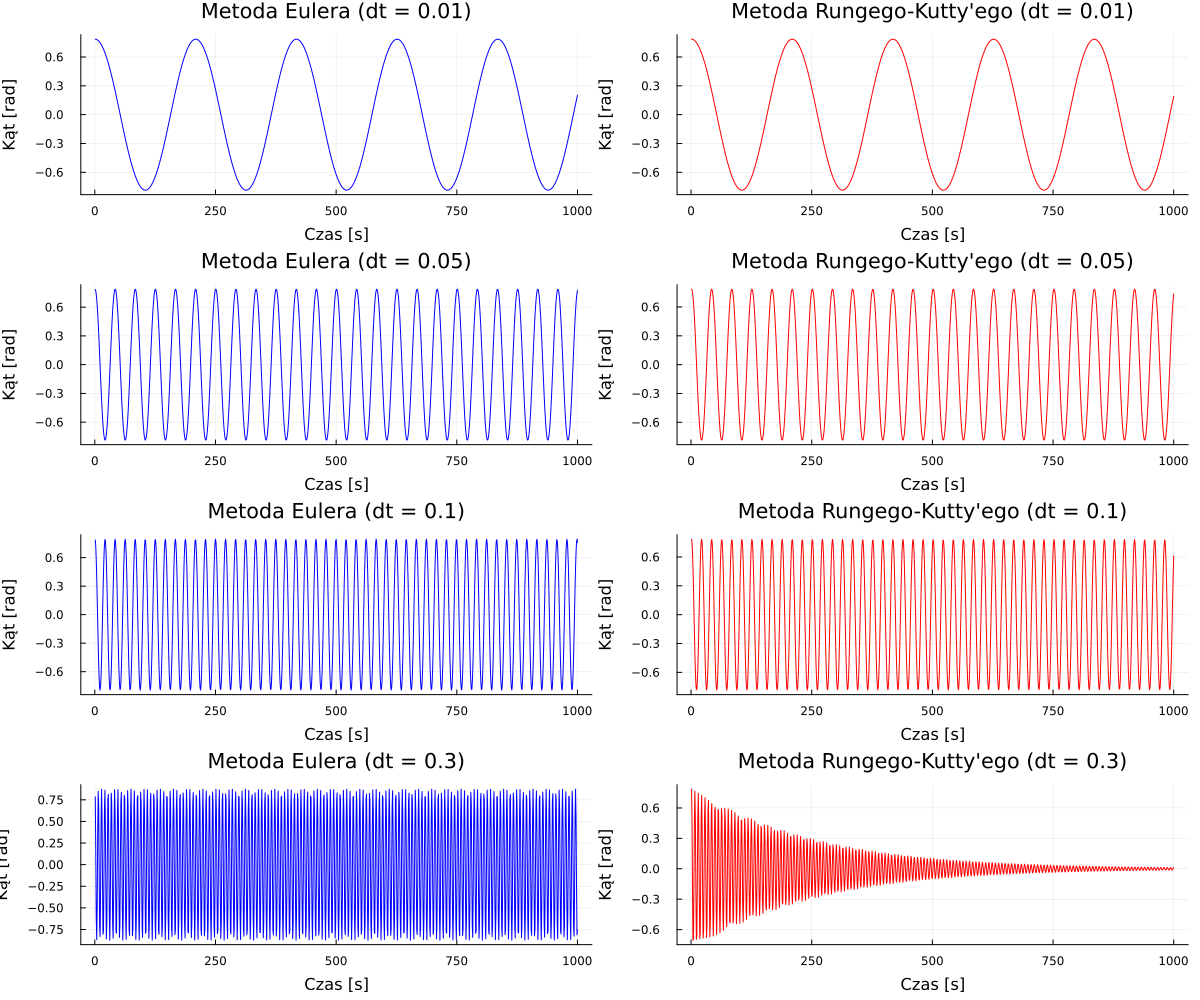

In [16]:
plt = plot(
    size=(1200, 1000), 
    linewidth=2,  
    color = "blue",  
    layout=(4, 2),  
    xlabel="Czas [s]",  
    ylabel="Kąt [rad]",  
    legend=false, 
)

for (i, idx) in enumerate(1:2:length(dt_values)*2)
    plot!(plt, theta_euler_results[i], title="Metoda Eulera (dt = $(dt_values[i]))", color="blue", subplot=idx)

    plot!(plt, theta_rk_results[i], title="Metoda Rungego-Kutty'ego (dt = $(dt_values[i]))", color="red", subplot=(idx+1))
end

display(plt)


Z wykresów zauważamy, że metoda Rungego-Kutty dla kroku czasowego dt = 0.3, prowadzi do wygadszeń drgań co świadczy o gorszej stabilności numerycznej w porównaniu do metody Eulera. Im większy krok czasowy (dt), tym większy błąd numeryczny może być propagowany w każdym kroku. Gdy dt jest zbyt duże, błędy numeryczne mogą kumulować się, prowadząc do niestabilności numerycznej. Aby uniknąć niestabilności, zwykle stosuje się małe kroki czasowe.



### Animacja

[ Info: Saved animation to c:\Users\tomci\Desktop\mownit\lab10\wahadlo.gif


Plots.AnimatedGif("c:\\Users\\tomci\\Desktop\\mownit\\lab10\\wahadlo.gif")
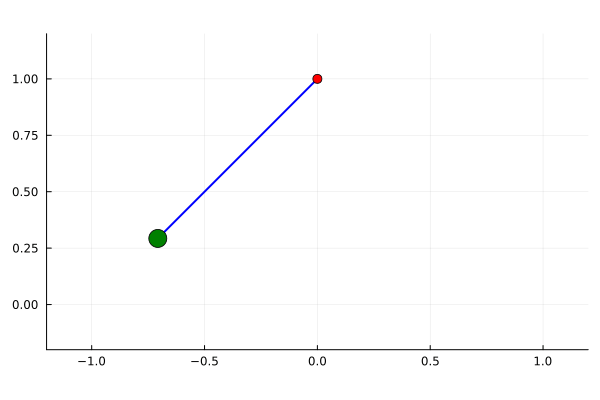

In [21]:
# Definicja funkcji rysującej wahadło
function draw_pendulum(theta, l)
    x = sin(theta)
    y = -cos(theta)
    plot([-x, 0], [y+l, l], linewidth=2, color="blue", aspect_ratio=1, xlims=(-1.2, 1.2), ylims=(-1.2+l, 0.2+l), legend=false)
    scatter!([0], [l], markersize=5, color="red")
    scatter!([-x], [y+l], markersize=10, color="green")
end

# Funkcja do tworzenia animacji
function animate_pendulum(theta_values, l)
    anim = @animate for theta in theta_values
        draw_pendulum(theta, l)
    end
    return anim
end


dt = 0.05
l=1
# Obliczenie kolejnych wychyleń wahadła za pomocą metody Eulera
theta_values, _ = euler_method(theta0, omega0, g, l, dt, n)

# Tworzenie animacji
animation = animate_pendulum(theta_values, l)
gif(animation, "wahadlo.gif", fps=60)

### Podwójne wahadło

$$ l_1 \frac{d^2\theta_1}{dt^2} = -g \sin(\theta_1) - \frac{m_2}{m_1 + m_2} l_1 \frac{d^2\theta_2}{dt^2} \sin(\theta_1 - \theta_2) - \frac{m_2}{m_1 + m_2} l_2 \frac{d^2\theta_2}{dt^2} \sin(\theta_1 - \theta_2) $$

$$ l_2 \frac{d^2\theta_2}{dt^2} = -g \sin(\theta_2) + \frac{m_1 + m_2}{m_1 + m_2} l_1 \frac{d^2\theta_1}{dt^2} \sin(\theta_1 - \theta_2) + l_2 \frac{d^2\theta_2}{dt^2} \sin(\theta_1 - \theta_2) $$


- $l_1, l_2$: Długości prętów pierwszego i drugiego wahadła.
- $\theta_1, \theta_2$: Kąty wychyleń pierwszego i drugiego wahadła od położenia równowagi.
- $\frac{d^2\theta_1}{dt^2}, \frac{d^2\theta_2}{dt^2}$: Przyspieszenia kątowe pierwszego i drugiego wahadła.
- $m_1, m_2$: Masy pierwszego i drugiego ciężarka.
- $g$: Przyspieszenie ziemskie.


In [10]:
# Parametry
g = 9.81  # Przyspieszenie ziemskie (m/s^2)
l1 = 1.0   # Długość wahadła (m)
l2 = 1.0
theta10 = pi/4  # Początkowy kąt wychylenia (radiany)
omega10 = 0.0  # Początkowa prędkość kątowa (rad/s)
theta20 = 0.0  # Początkowy kąt wychylenia (radiany)
omega20 = 0.0  # Początkowa prędkość kątowa (rad/s)
m1 = 1
m2 = 1
dt = 0.05    # Krok czasowy (s)
n = 1000    # Liczba kroków czasowych

1000

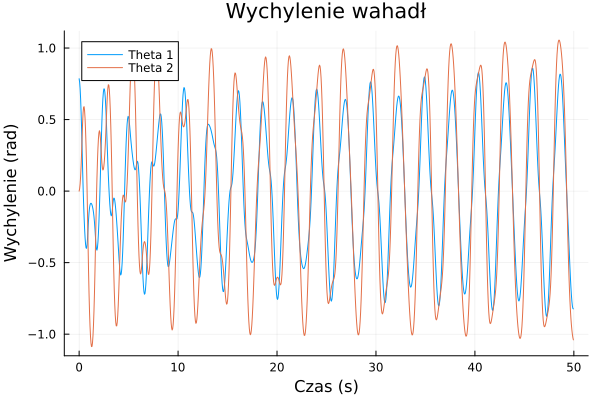

In [4]:
# Funkcja obliczająca wychylenia wahadła podwójnego metodą Eulera
function double_pendulum_euler(theta10, omega10, theta20, omega20, l1, l2, m1, m2, g, dt, n)

    theta1_list = zeros(n)
    omega1_list = zeros(n)
    theta2_list = zeros(n)
    omega2_list = zeros(n)
    
    theta1_list[1] = theta10
    omega1_list[1] = omega10
    theta2_list[1] = theta20
    omega2_list[1] = omega20
    
    # Pętla obliczeniowa
    for i in 1:n-1
        # Obliczanie nowych prędkości kątowych
        alpha1 = (-g*(2*m1 + m2)*sin(theta1_list[i]) - m2*g*sin(theta1_list[i] - 2*theta2_list[i]) - 2*sin(theta1_list[i] - theta2_list[i])*m2*(omega2_list[i]^2*l2 + 
                omega1_list[i]^2*l1*cos(theta1_list[i] - theta2_list[i]))) / (l1*(2*m1 + m2 - m2*cos(2*theta1_list[i] - 2*theta2_list[i])))
        alpha2 = (2*sin(theta1_list[i] - theta2_list[i])*(omega1_list[i]^2*l1*(m1 + m2) + g*(m1 + m2)*cos(theta1_list[i]) + omega2_list[i]^2*l2*m2*cos(theta1_list[i] - theta2_list[i]))) / 
                (l2*(2*m1 + m2 - m2*cos(2*theta1_list[i] - 2*theta2_list[i])))
        
        omega1_new = omega1_list[i] + alpha1 * dt
        omega2_new = omega2_list[i] + alpha2 * dt
        
        # Obliczanie nowych kątów
        theta1_new = theta1_list[i] + omega1_new * dt
        theta2_new = theta2_list[i] + omega2_new * dt
        
        theta1_list[i+1] = theta1_new
        omega1_list[i+1] = omega1_new
        theta2_list[i+1] = theta2_new
        omega2_list[i+1] = omega2_new
    end
    
    return theta1_list, theta2_list
end

# Wywołanie funkcji
theta1_list, theta2_list = double_pendulum_euler(theta10, omega10, theta20, omega20, l1, l2, m1, m2, g, dt, n)

# Generowanie czasu dla wykresu
t = dt .* (0:n-1)

# Tworzenie wykresów
plot(t, theta1_list, label="Theta 1", xlabel="Czas (s)", ylabel="Wychylenie (rad)", title="Wychylenie wahadł")
plot!(t, theta2_list, label="Theta 2")

[ Info: Saved animation to c:\Users\tomci\Desktop\mownit\lab10\wahadlo2.gif


Plots.AnimatedGif("c:\\Users\\tomci\\Desktop\\mownit\\lab10\\wahadlo2.gif")
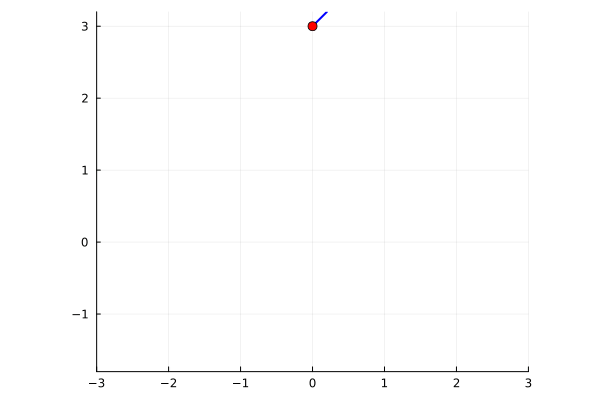

In [16]:
function draw_pendulum(theta1, theta2, l1, l2)
    # Obliczenie położenia końca pierwszego wahadła
    x1 = l1 * sin(theta1)
    y1 = -(l1 * cos(theta1)) + l1 + l2

    # Obliczenie położenia końca drugiego wahadła
    x2 = x1 + l2 * sin(theta2)
    y2 = y1 - l2 * cos(theta2)

    plot([0, x1, x2], [l1+l2, y1, y2], linewidth=2, color="blue", aspect_ratio=1, xlims=(-(l1 + l2), (l1 + l2)), ylims=(-(l1 + l2 - 1.2), l1 + l2 + 0.2), legend=false)
    scatter!([0], [l1+l2], markersize=5, color="red")
    scatter!([x1], [y1], markersize=10, color="green")
    scatter!([x2], [y2], markersize=10, color="green")
end

# Funkcja do tworzenia animacji
function animate_pendulum(theta_values1, theta_values2, l1, l2)
    anim = @animate for i in 1:length(theta_values1)
        draw_pendulum(theta_values1[i], theta_values2[i], l1, l2)
    end
    return anim
end

theta10 = 3*pi/4
n = 200
# Obliczenie kolejnych wychyleń wahadła za pomocą metody Eulera
theta_values1, theta_values2 = double_pendulum_euler(theta10, omega10, theta20, omega20, l1, l2, m1, m2, g, dt, n)

# Tworzenie animacji
animation = animate_pendulum(theta_values1, theta_values2, l1, l2)
gif(animation, "wahadlo2.gif", fps=60)